In [2]:
import pygeostat as gs
% matplotlib inline

Autoloading `gsParams` from C:\Users\nayrm/.gsParams
Autoloading `gsPlotStyle` from C:\Users\nayrm/.gsParams


In [3]:
import spatialcluster as sp

In [4]:
custom = {"savefig.dpi": 125,
            "figure.dpi": 125,
            "figure.figsize": (4, 3),
            "axes.grid": True,
            'grid.alpha': 1.0,
            'grid.color': 'black',
            'grid.linestyle': '-.',
            'grid.linewidth': 0.25,
            "axes.formatter.useoffset": False,
            "xtick.major.pad": 1,
            "ytick.major.pad": 1}
gs.set_style("pt7", custom)

In [5]:
datfl = gs.DataFile("testdat.dat")

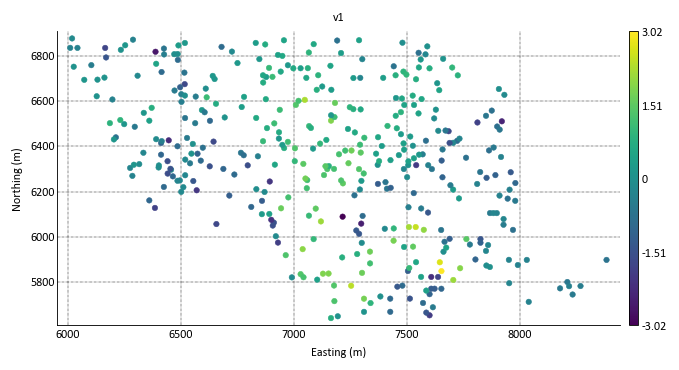

In [6]:
gs.locmap(datfl, var='v1', figsize=(6, 6))

In [7]:
mvdata = datfl.data[['v1', 'v2', 'v3', 'v4']].values

In [8]:
locations = datfl[['X', 'Y']].values

In [9]:
mvdata.shape

(395, 4)

In [10]:
encl = sp.ACEnsemble(mvdata, locations, minvars=4, nnears=25, 
                     cluster_method='kmeans', acmetric=[1], minfound=0.01)

In [11]:
encl.fit(7)

Working on 0, skipped 0
Working on 10, skipped 0
Working on 20, skipped 0
Working on 30, skipped 0
Working on 40, skipped 0
Working on 50, skipped 0
Working on 60, skipped 0
Working on 70, skipped 0
Working on 80, skipped 0
Working on 90, skipped 0
Finished! Skipped 0 clusterings from insufficient proportions


In [12]:
datfl.data['final'] = encl.predict(4)

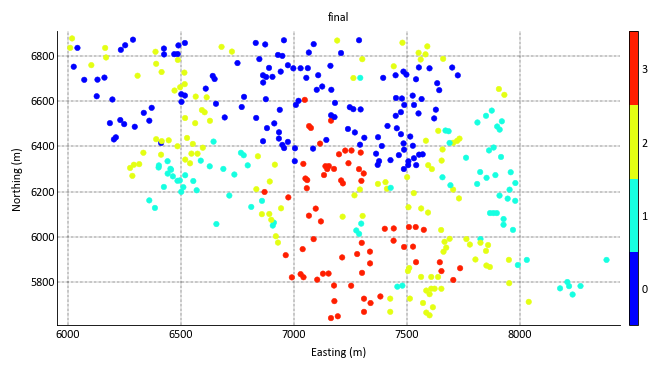

In [13]:
gs.locmap(datfl, var='final', cmap='jet', figsize=(6, 6))

# test the scripting stuff

In [15]:
! where acens

C:\Anaconda3\Scripts\acens.exe


In [16]:
acens = gs.Program('acens')
acenspar = """START OF DATA:
testdat.dat         - file with the input dataset
0  1  2  0          - columns for dh, x, y, z data
3  4  5  6          - columns for variables (implicit nvar)
outfile.out         - file for clustering output
0    1              - save all reals? recode clusters? (0=No, 1=Yes)
1                   - append output to input file? (0=No, 1=Yes)

START OF AC:        # autocorrelation settings
25                  - number of nearest neighbors
0  0  0             - search anisotropy/ ang1, ang2, ang3
500 500 500         - range1, range2, range3
gmm              - one of `kmeans`, `gmm`, `hier`
1  2                - autocorrelation metrics (0, 1, 2)
0.5 0.5             - autocorrelation props

START OF ENS:       # ensemble settings
523151              - random seed
100                 - num ensemble
-1                  - min number of variables, -1 to use all
4  6                - final nclus, target nclus
0.05 0.15            - min and max proportion to remove
0.001 0.999         - min and max proportion in found clustering
spec                - final consensus method, `spec`(tral) or `hier`(archical)
"""
acens.run(parstr=acenspar)

C:\GIT\python-local\spatialcluster\spatialcluster\examples\tmp80wggs8m\acensemble.par has been copied to the clipboard
Calling:  ['acens', 'temp']
Reading parfile from `temp`
Working on 0, skipped 0
Working on 10, skipped 0
Working on 20, skipped 0
Working on 30, skipped 0
Working on 40, skipped 0
Working on 50, skipped 0
Working on 60, skipped 0
Working on 70, skipped 0
Working on 80, skipped 0
Working on 90, skipped 0
Finished! Skipped 0 clusterings from insufficient proportions


In [17]:
datfl.data['final_prog'] = gs.DataFile("outfile.out").data['acens_clusters']

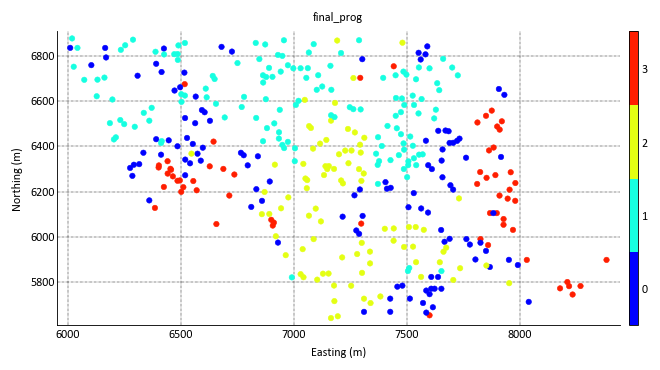

In [18]:
gs.locmap(datfl, var='final_prog', cmap='jet', figsize=(6, 6))